<h1> Name clusters based on gene expression of marker genes </h1>

markerGenes = c("Dmrt1","Piwil1","Tex21","Tnp1") <br>
typeOfCells = c("Spermatogonia","Spermatocytes","Round spermatids","Elongating spermatids")

In [1]:
library(scran)
library(scater)
library(bluster)

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    

In [2]:
load("data/ernst/spermatogenesisAllCellsErnst.Rdata")
sce

class: SingleCellExperiment 
dim: 19974 18345 
metadata(0):
assays(2): counts logcounts
rownames(19974): ENSMUSG00000051951 ENSMUSG00000025900 ...
  ENSMUSG00000064368 ENSMUSG00000064370
rowData names(6): ID Symbol ... ontologyTerm UNIPROT
colnames(18345): S9 - 1 S10 - 2 ... S4 - 53509 S11 - 53510
colData names(15): Sample Barcode ... AnnotatedClusters sizeFactor
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

In [3]:
load("data/ernst/spermatogenesisAllCellsErnstTF.Rdata")
sce_TF

class: SingleCellExperiment 
dim: 1505 18345 
metadata(0):
assays(2): counts logcounts
rownames(1505): ENSMUSG00000025902 ENSMUSG00000033740 ...
  ENSMUSG00000006270 ENSMUSG00000043969
rowData names(6): ID Symbol ... ontologyTerm UNIPROT
colnames(18345): S9 - 1 S10 - 2 ... S4 - 53509 S11 - 53510
colData names(20): Sample Barcode ... kmeans_order cellType1
reducedDimNames(3): PCA UMAP TSNE
mainExpName: NULL
altExpNames(0):

In [4]:
marker_genes = c("Dmrt1","Piwil1","Tex21","Tnp1")
sce$kmeans <- sce_TF$kmeans


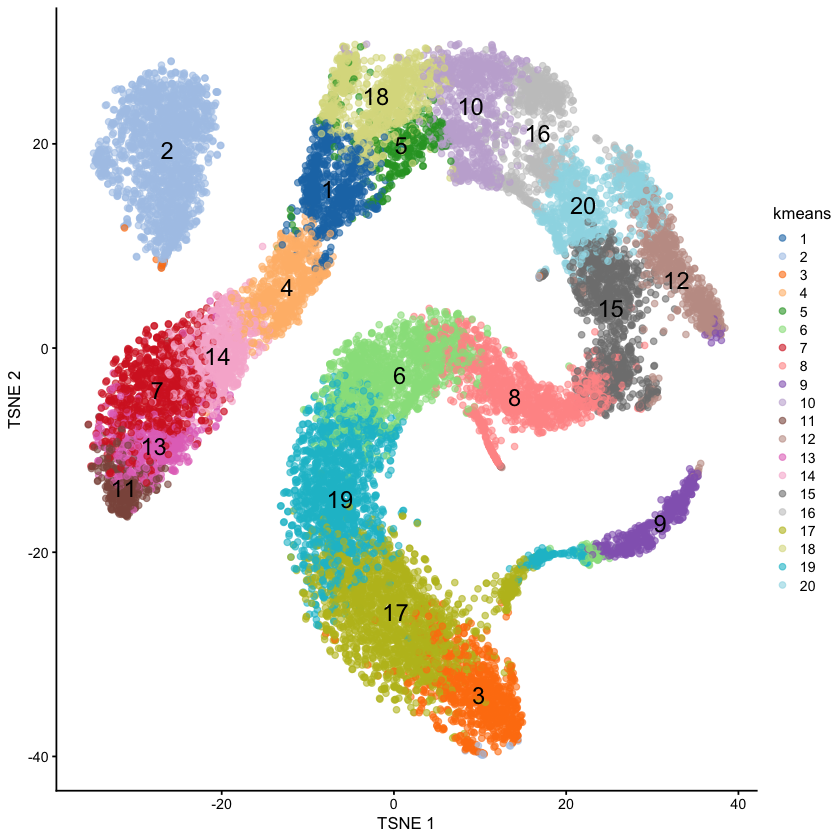

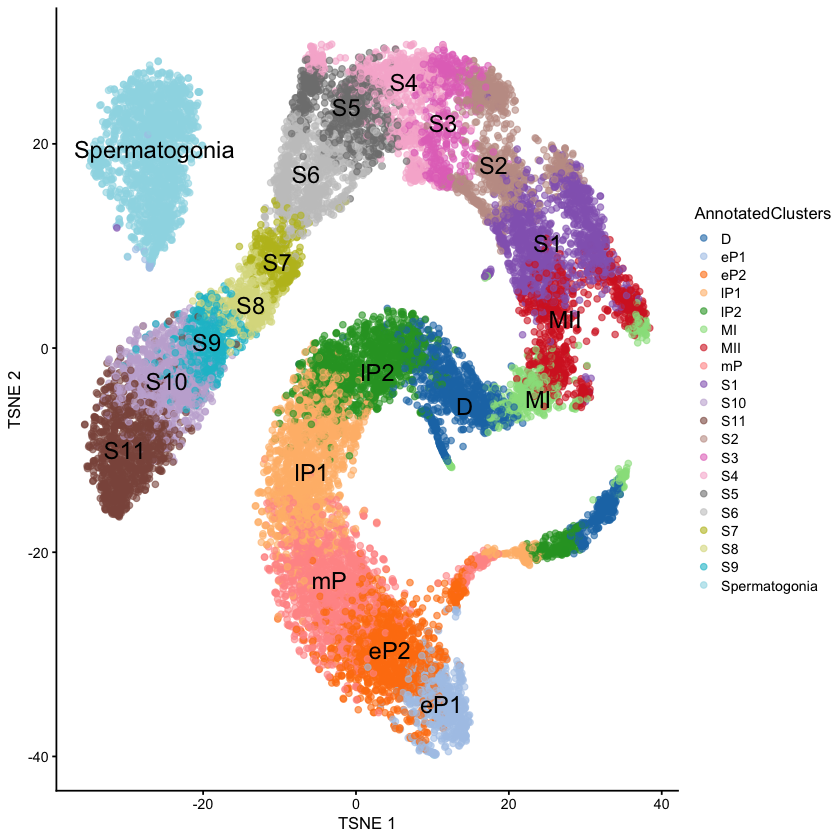

In [5]:
plotTSNE(sce_TF, colour_by = "kmeans", text_by="kmeans")
plotTSNE(sce_TF, colour_by = "AnnotatedClusters", text_by="AnnotatedClusters")

Note kmeans is not in a biological order comparing kmeans to annotated clusters

<h3> Oder clusters based on germ cell develoment </h3>

In [6]:
order = c("2","3","17","19","6","8","15","12","20","16","10","18","5","1","4","14","7","13","11","9")
cluster_order = sce_TF$kmeans


In [7]:
count = 101
for(i in order){
    levels(cluster_order) <- c(levels(cluster_order), count)
    cluster_order <- replace(cluster_order, cluster_order== i , count)
    count = count +1
}
cluster_order <- droplevels(cluster_order)
table(cluster_order)
sce_TF$kmeans_order <- cluster_order

cluster_order
 101  102  103  104  105  106  107  108  109  110  111  112  113  114  115  116 
1852  887 1846 1636 1398 1210  954  665  836  691  953  901  279  729  699  739 
 117  118  119  120 
 807  471  288  504 

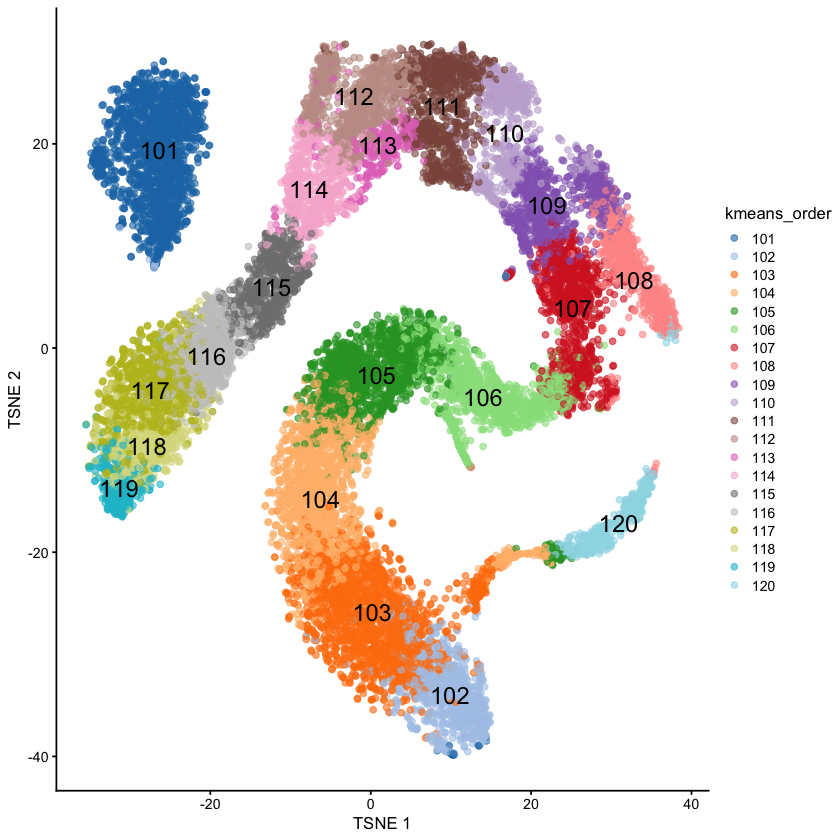

In [8]:
plotTSNE(sce_TF, colour_by = "kmeans_order", text_by="kmeans_order")

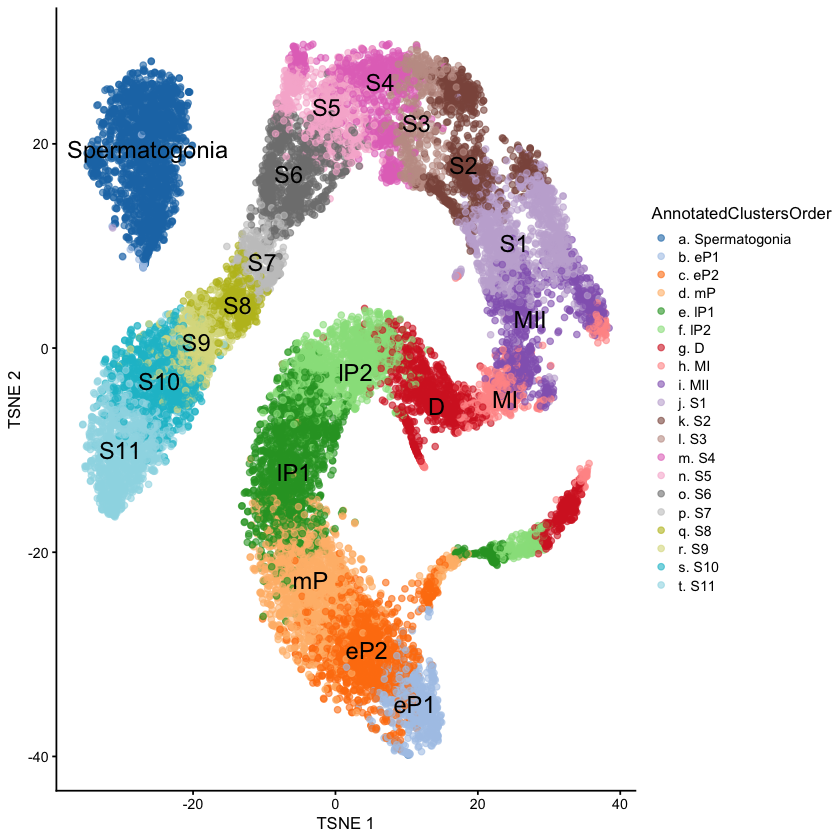

In [86]:
# Order annotated clusters to improve visualisation 
#AnnotatedClustersNoOrder = as.data.frame(table(sce_TF$AnnotatedClusters))["Var1"]
cluster_order = sce_TF$AnnotatedClusters
AnnotatedCluster= c("Spermatogonia","eP1","eP2","mP","lP1","lP2","D","MI","MII","S1","S2","S3",
                           "S4","S5","S6","S7","S8","S9","S10","S11")
AnnotatedClustersOrder= c("a. Spermatogonia","b. eP1","c. eP2","d. mP","e. lP1","f. lP2","g. D","h. MI","i. MII","j. S1","k. S2","l. S3",
                           "m. S4","n. S5","o. S6","p. S7","q. S8","r. S9","s. S10","t. S11")

count = 1
for(i in AnnotatedCluster){
    levels(cluster_order) <- c(levels(cluster_order), AnnotatedClustersOrder[count])
    cluster_order <- replace(cluster_order, cluster_order== i , AnnotatedClustersOrder[count])
    count = count +1
}

sce_TF$AnnotatedClustersOrder <- cluster_order
plotTSNE(sce_TF, colour_by = "AnnotatedClustersOrder", text_by="AnnotatedClusters")

<h3>Create a heatmap of expression of gene markers</h3>

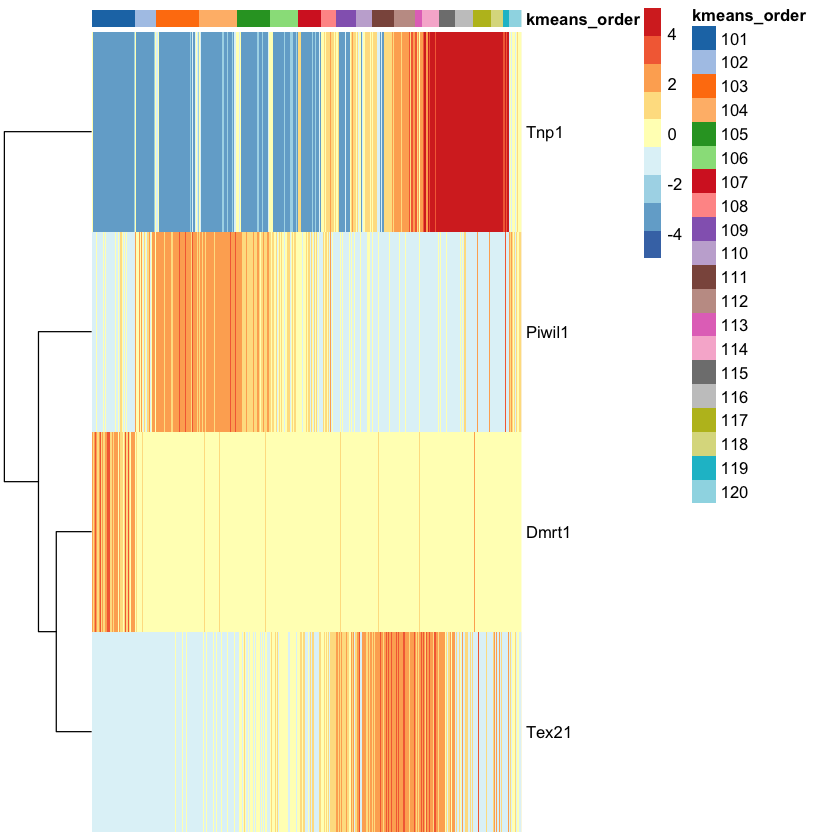

In [9]:
library(pheatmap)

sce$kmeans_order <- cluster_order

markerGenes = c("Dmrt1","Piwil1","Tex21","Tnp1")
typeOfCells = c("Spermatogonia","Spermatocytes","Round spermatids","Elongating spermatids")

#top.markers <- rownames(marker.set)[marker.set$Top <= 10]
plotHeatmap(sce, features=marker_genes, columns=order(sce$kmeans_order), 
    colour_columns_by=c("kmeans_order"),
    cluster_cols=FALSE, center=TRUE, zlim=c(-5, 5),  
    swap_rownames= "Symbol",
    show_colnames = FALSE) 

In [87]:
order = c("101","102","103","104","105","106","107","108","109","110","111","112","113","114","115","116","117","118","119","120")


orderName = c("Spermatogonia","Spermatocytes","Spermatocytes","Spermatocytes","Spermatocytes","Spermatocytes","Spermatocytes","Spermatocytes","Round spermatids","Round spermatids","Round spermatids","Round spermatids","Round spermatids","Round spermatids","Elongating spermatids","Elongating spermatids","Elongating spermatids","Elongating spermatids","Elongating spermatids","Spermatocytes")



In [88]:
cluster_order <- sce_TF$kmeans_order
count = 1
for(i in order){
    levels(cluster_order) <- c(levels(cluster_order), orderName[count])
    cluster_order <- replace(cluster_order, cluster_order== i , orderName[count])
    count = count +1
}
cluster_order <- droplevels(cluster_order)
table(cluster_order)
sce$cellType1 <- cluster_order

#

cluster_order
        Spermatogonia         Spermatocytes      Round spermatids 
                 1852                  9100                  4389 
Elongating spermatids 
                 3004 

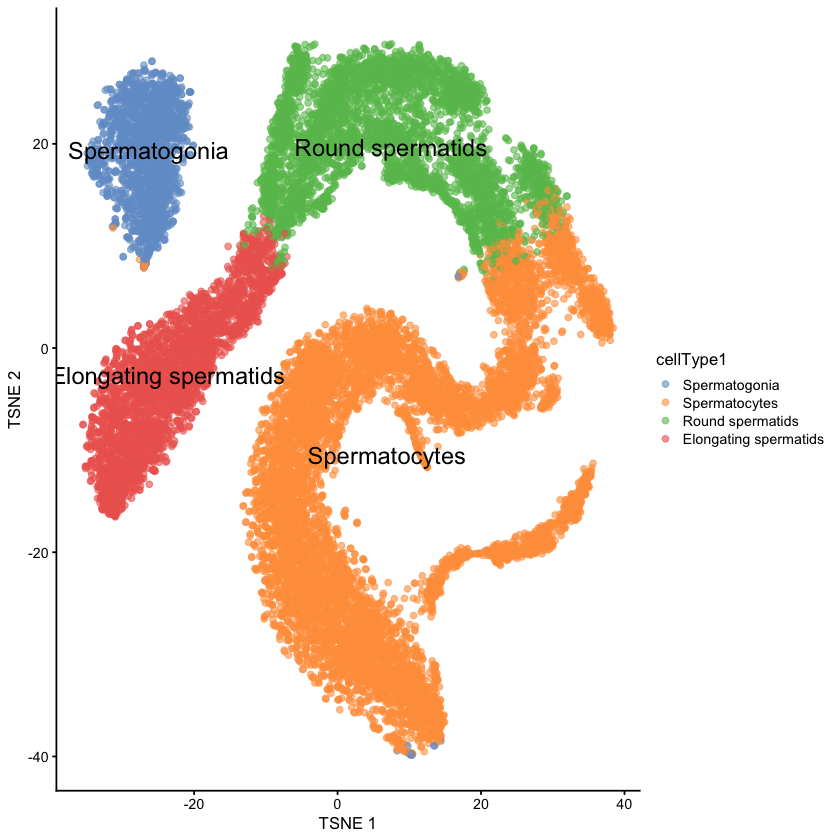

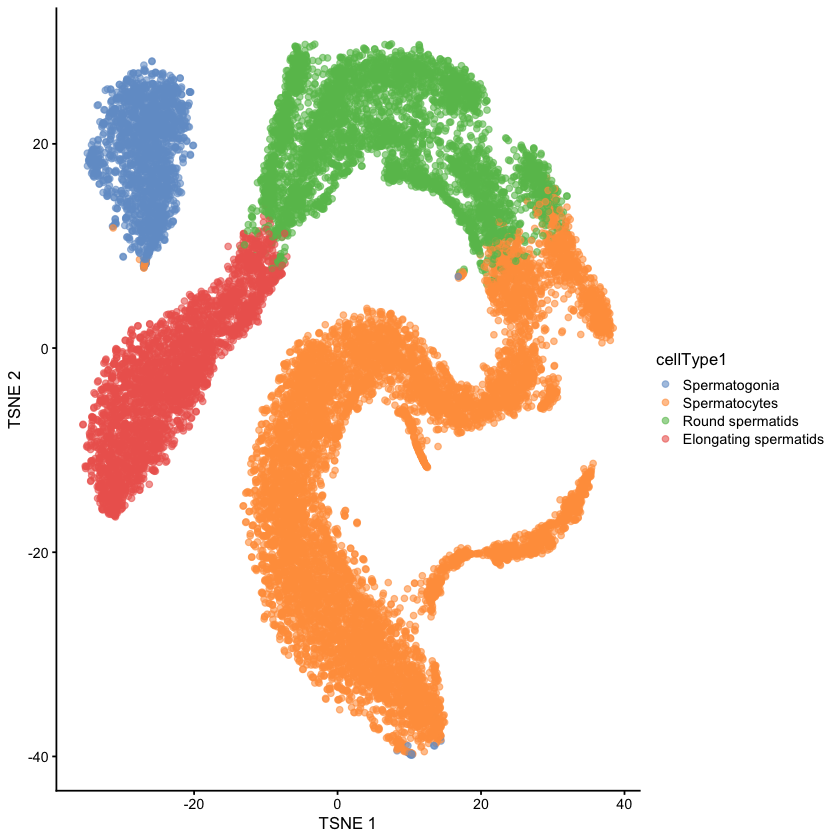

In [90]:
sce_TF$cellType1 <- cluster_order

plotTSNE(sce_TF, colour_by = "cellType1", text_by="cellType1")
plotTSNE(sce_TF, colour_by = "cellType1")


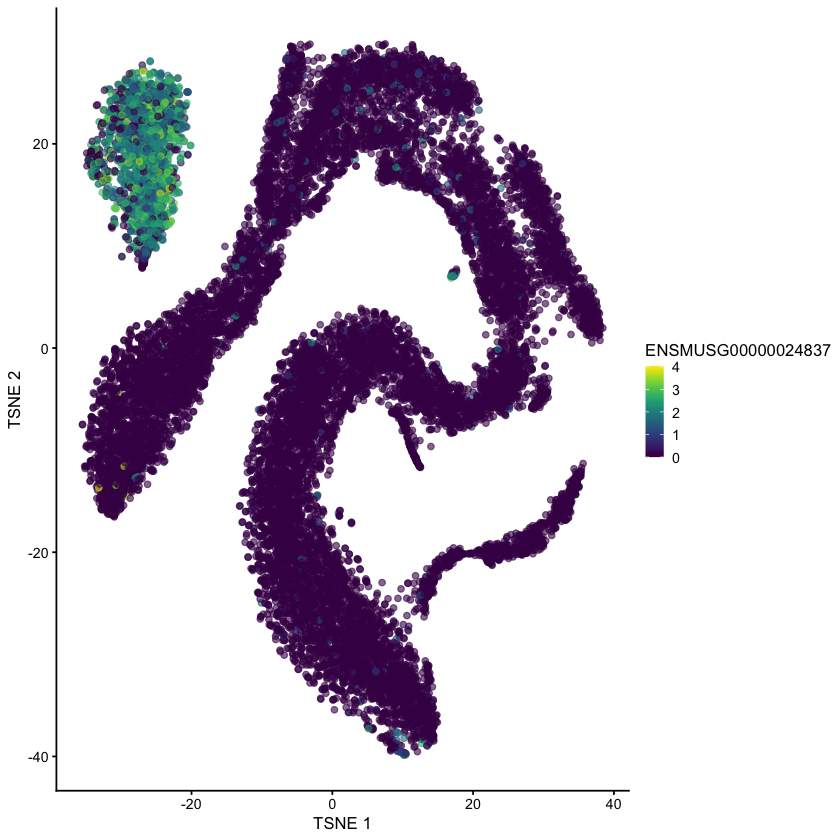

In [79]:
# Visualise gene expression of Dmrt1 in the TSNE plot
geneSymbol = rowData(sce_TF)[ rowData(sce_TF)[,"Symbol"]=="Dmrt1"  ,"ID"] 

plotTSNE(sce_TF, colour_by=geneSymbol )

In [74]:
# Visualise gene expression of Piwil1 in the TSNE plot

geneID = rowData(sce)[ rowData(sce)[,"Symbol"]=="Piwil1"  ,"ID"] 

Piwil1 = logcounts(sce[geneID,])
sce_TF$Piwil1 <- colMeans(Piwil1)



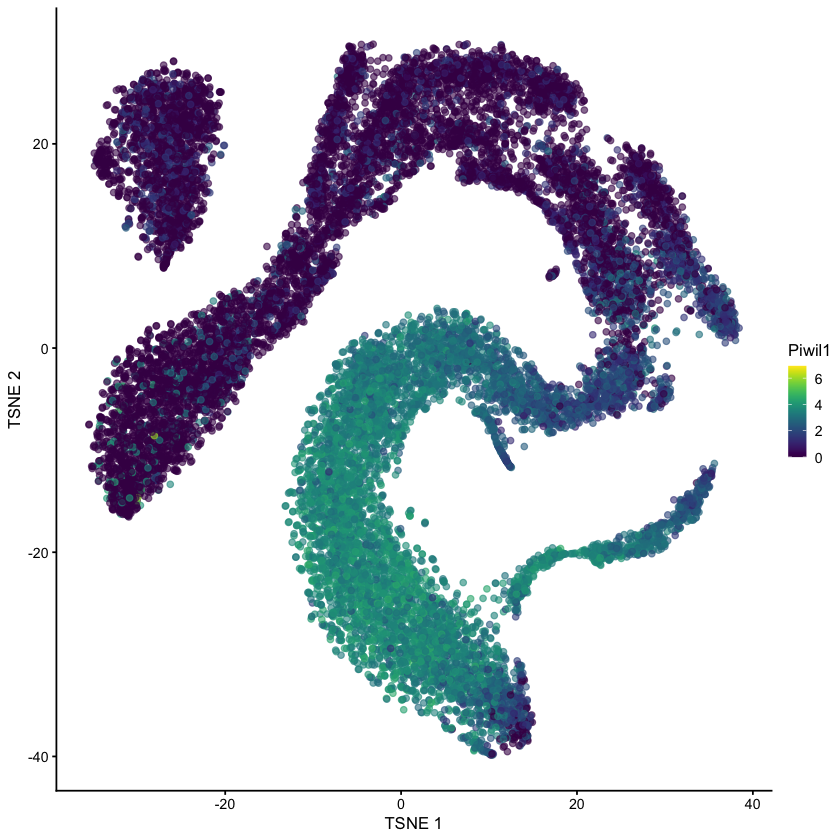

In [73]:
plotTSNE(sce_TF, colour_by = "Piwil1")

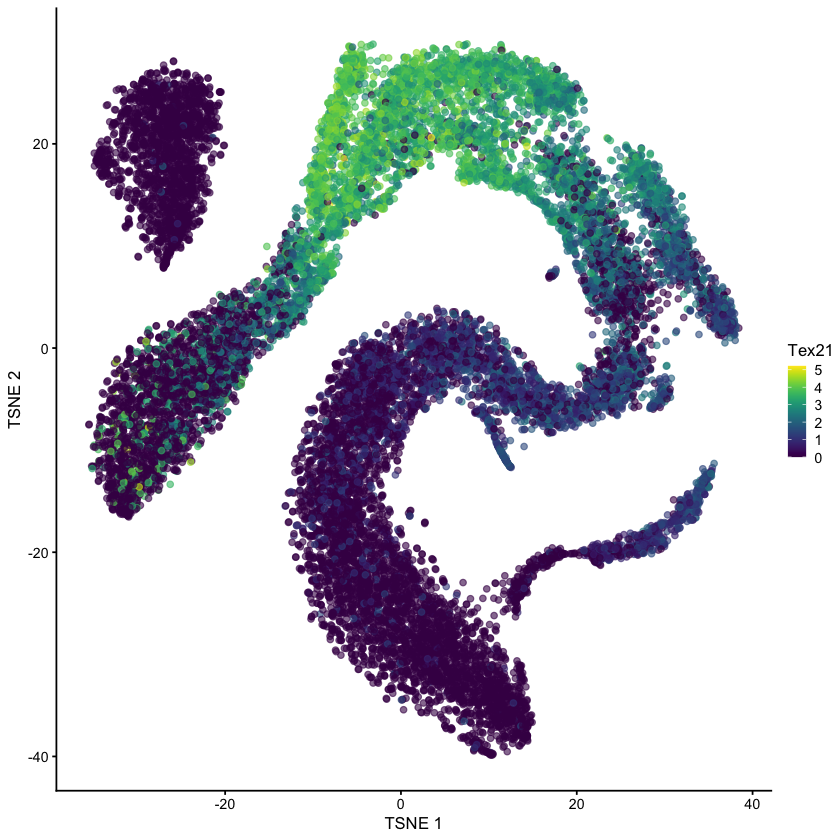

In [76]:
# Visualise gene expression of Tex21 in the TSNE plot

geneID = rowData(sce)[ rowData(sce)[,"Symbol"]=="Tex21"  ,"ID"] 

Tex21 = logcounts(sce[geneID,])

sce_TF$Tex21 <- colMeans(Tex21)

plotTSNE(sce_TF, colour_by = "Tex21")

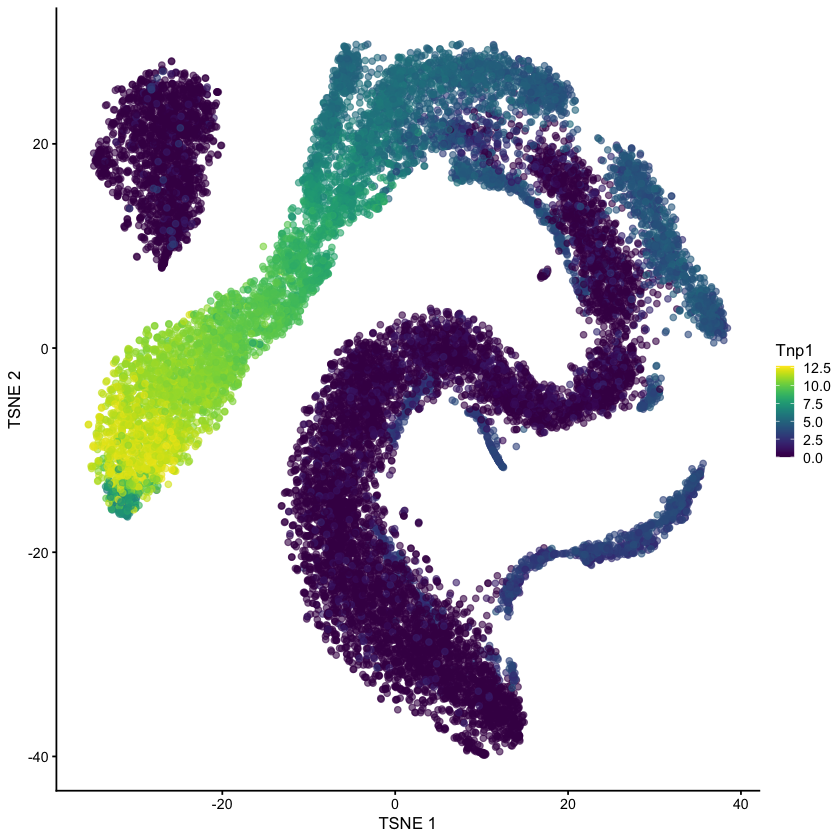

In [78]:
# Visualise gene expression of Dmrt1 in the TSNE plot

geneID = rowData(sce)[ rowData(sce)[,"Symbol"]=="Tnp1"  ,"ID"] 

Tnp1 = logcounts(sce[geneID,])

sce_TF$Tnp1 <- colMeans(Tnp1)

plotTSNE(sce_TF, colour_by = "Tnp1")

In [13]:
save(sce_TF, file="data/ernst/spermatogenesisAllCellsErnstTF.Rdata")

In [14]:
save(sce, file="data/ernst/spermatogenesisAllCellsErnst.Rdata")
